In [9]:
library(ggplot2)
library(dplyr)
library(kableExtra)

In [2]:
data <- read.table("SIS3.txt" , sep ='\t', header=TRUE)
data

,model,features,target,spearman_stat,spearman_pvalue,log10_spearman_pvalue,pearson_stat,pearson_pvalue,log10_pearson_pvalue,rmse
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LogisticRegression,sig proteins + Time Since Stroke + Age,[SIS3],0.02,0.84,0.07,-0.02,0.86,0.07,23.28
2,LogisticRegression,all proteins +,[SIS3],0.21,0.05,1.28,0.24,0.03,1.54,20.86
3,LogisticRegression,all proteins + Time Since Stroke,[SIS3],0.24,0.03,1.54,0.28,0.01,2.08,20.13
4,LogisticRegression,all proteins + Age,[SIS3],0.30,0.01,2.28,0.30,0.01,2.23,19.93
5,LogisticRegression,all proteins + Age + Time Since Stroke,[SIS3],0.36,0.00,3.08,0.41,0.00,4.09,18.81


In [3]:
knitr::kable(head(data[, c(2,4,6, 7, 9, 10)]),"simple")



features                                  spearman_stat   log10_spearman_pvalue   pearson_stat   log10_pearson_pvalue    rmse
---------------------------------------  --------------  ----------------------  -------------  ---------------------  ------
sig proteins + Time Since Stroke + Age             0.02                    0.07          -0.02                   0.07   23.28
all proteins +                                     0.21                    1.28           0.24                   1.54   20.86
all proteins + Time Since Stroke                   0.24                    1.54           0.28                   2.08   20.13
all proteins + Age                                 0.30                    2.28           0.30                   2.23   19.93
all proteins + Age + Time Since Stroke             0.36                    3.08           0.41                   4.09   18.81

In [4]:
data1 <- data[c(2,3,4,5),c(2,7,8,9,10)]
knitr::kable(data1,"simple")



     features                                  pearson_stat   pearson_pvalue   log10_pearson_pvalue    rmse
---  ---------------------------------------  -------------  ---------------  ---------------------  ------
2    all proteins +                                    0.24             0.03                   1.54   20.86
3    all proteins + Time Since Stroke                  0.28             0.01                   2.08   20.13
4    all proteins + Age                                0.30             0.01                   2.23   19.93
5    all proteins + Age + Time Since Stroke            0.41             0.00                   4.09   18.81

# Pearson

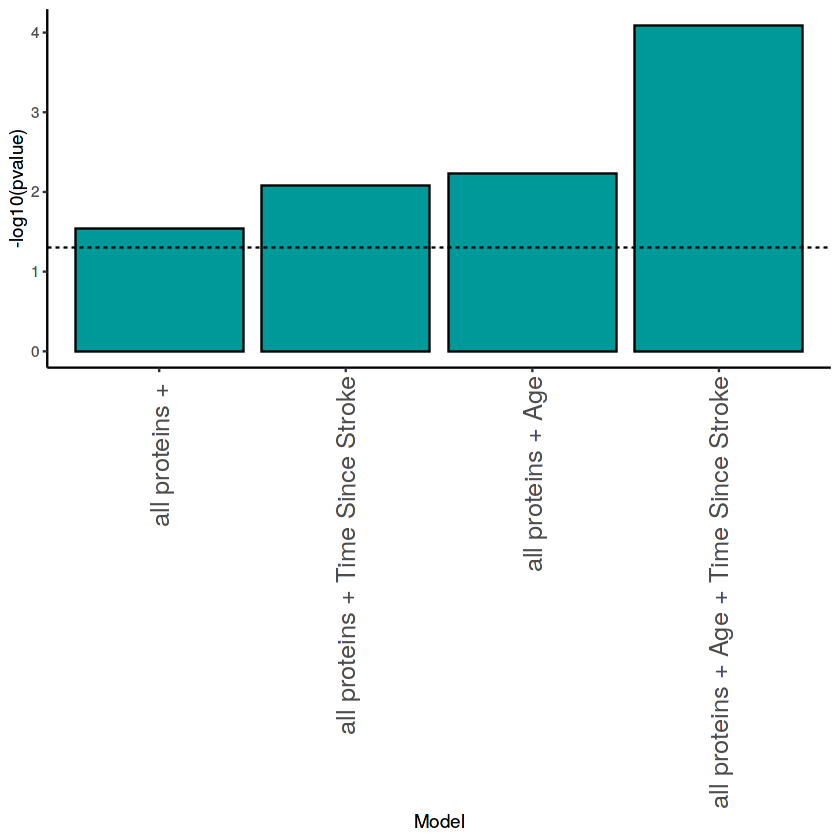

In [13]:
#tiff("figures/Figure2.tiff", units="in", width=10, height=10, res=300)
ggplot(data1, aes(x = reorder(features, log10_pearson_pvalue), y = log10_pearson_pvalue, fill = pearson_stat)) + 
geom_bar(stat="identity", fill="#009999", colour="black")+ labs(x="Model", y = "-log10(pvalue)")+
   theme_classic()+ theme(axis.text.x = element_text(size = 15, angle = 90, vjust = 0.5, hjust=1)) + geom_hline(yintercept=1.301, linetype="dashed", 
                color = "black", size=0.5) #+ geom_label(aes(label=Pearson_stat),color="black",size=5,vjust= -0.1)
#dev.off()

In [14]:
data2 <- data[c(1,5),c(2,7,8,9,10)]
knitr::kable(data2,"simple")



     features                                  pearson_stat   pearson_pvalue   log10_pearson_pvalue    rmse
---  ---------------------------------------  -------------  ---------------  ---------------------  ------
1    sig proteins + Time Since Stroke + Age           -0.02             0.86                   0.07   23.28
5    all proteins + Age + Time Since Stroke            0.41             0.00                   4.09   18.81

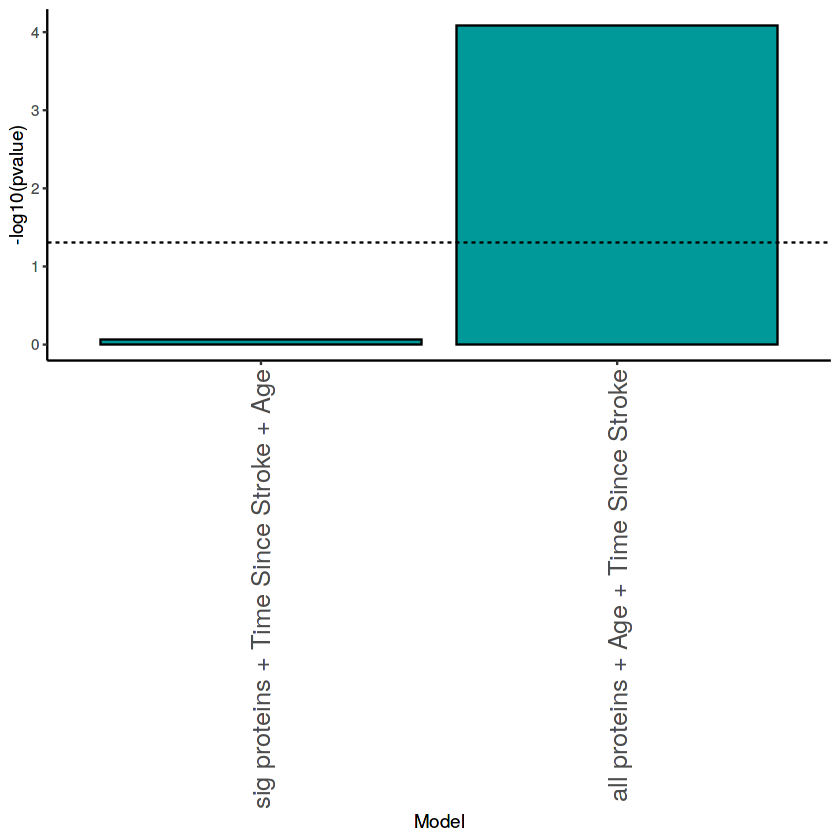

In [15]:
#tiff("figures/Figure3.tiff", units="in", width=10, height=10, res=300)
ggplot(data2, aes(x = reorder(features, log10_pearson_pvalue), y = log10_pearson_pvalue, fill = pearson_stat)) + 
geom_bar(stat="identity", fill="#009999", colour="black") + labs(x="Model", y = "-log10(pvalue)")+
   theme_classic()+ theme(axis.text.x = element_text(size = 15, angle = 90, vjust = 0.5, hjust=1)) + geom_hline(yintercept=1.301, linetype="dashed", 
                color = "black", size=0.5)
#dev.off()

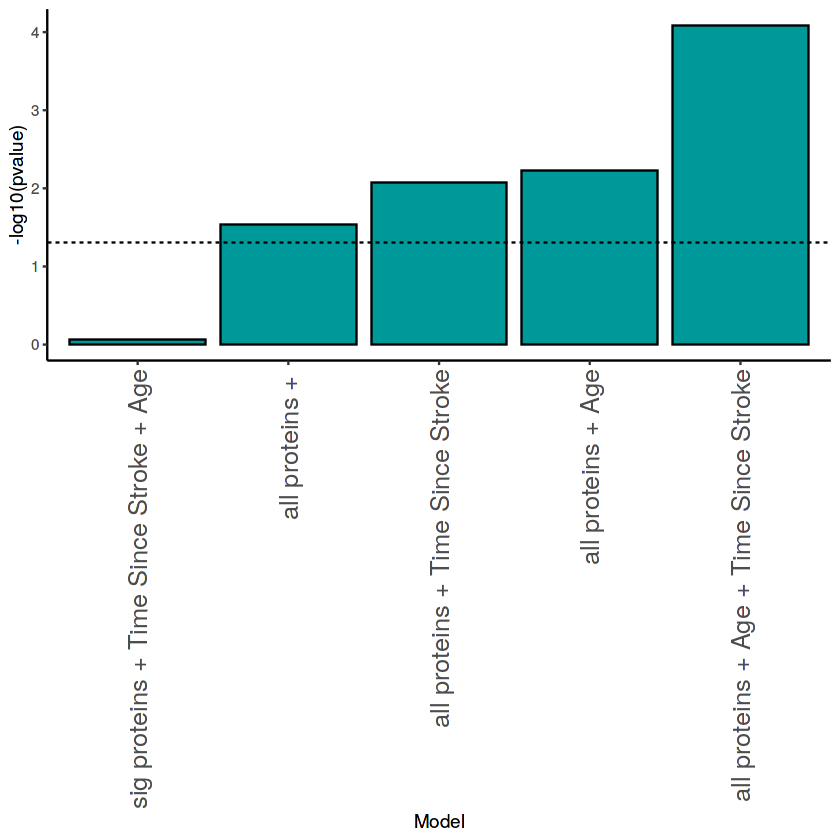

In [16]:
ggplot(data, aes(x = reorder(features, log10_pearson_pvalue), y = log10_pearson_pvalue, fill = pearson_stat)) + 
geom_bar(stat="identity", fill="#009999", colour="black") + labs(x="Model", y = "-log10(pvalue)")+
   theme_classic()+ theme(axis.text.x = element_text(size = 15, angle = 90, vjust = 0.5, hjust=1)) + geom_hline(yintercept=1.301, linetype="dashed", 
                color = "black", size=0.5)